# 1. IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                         # 차트
import seaborn as sns
import os                                               # 파일관리
from sklearn.datasets import load_iris                  # sklearn 데이터셋 

In [2]:
# 머신러닝 학습/평가/검증
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, f1_score, recall_score, precision_score, precision_recall_curve, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'           # 한글 폰트 설정

In [4]:
import warnings
warnings.filterwarnings(action='ignore')                # ignore warnings

# 2. LOAD DATA

In [5]:
os.getcwd()

'C:\\IT\\workspace_python\\venv\\FT\\Part2_MLDL\\titanic'

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'titanic.ipynb',
 'titanic_dl.py',
 'titanic_test.csv',
 'titanic_train.csv']

In [7]:
train= pd.read_csv('titanic_train.csv')
test= pd.read_csv('titanic_test.csv')

# 3. EDA

In [8]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [9]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

- 컬럼명 변경

In [10]:
train.columns = [i.lower() for i in train.columns.to_list()]
test.columns = [i.lower() for i in test.columns.to_list()]

- target : survived

In [11]:
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- 결측치 확인

In [13]:
print(train.isna().sum())

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


In [14]:
print(test.isna().sum())

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64


In [15]:
train[train['embarked'].isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- 상관분석

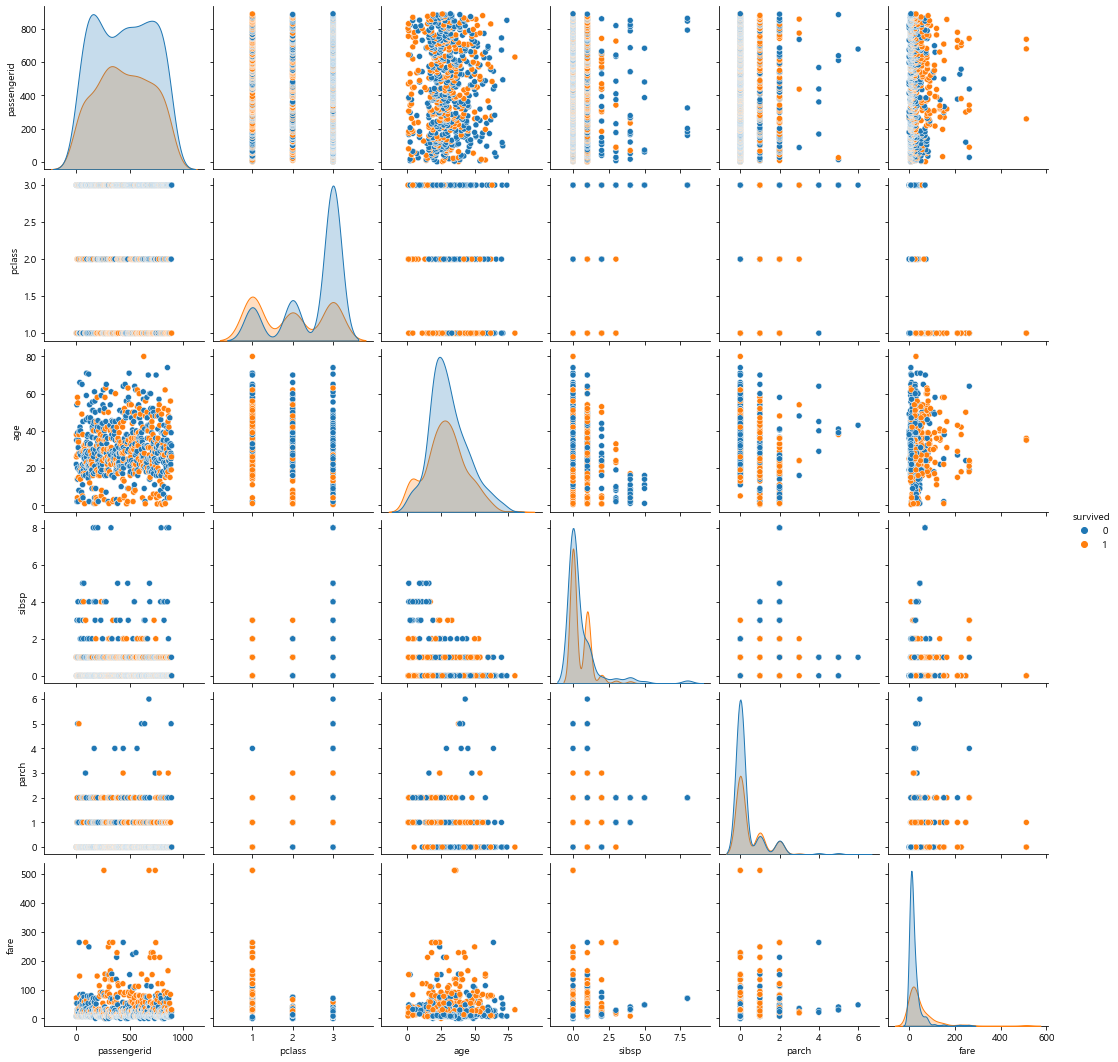

In [16]:
sns.pairplot(train, hue='survived')
plt.show()

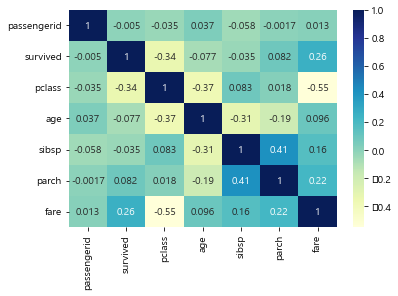

In [17]:
sns.heatmap(data=train.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [18]:
df_corr = pd.DataFrame()
df_corr['pearson'] = train.corrwith(train['survived'])
df_corr.sort_values('pearson',ascending=False)

,pearson
survived,1.000000
fare,0.257307
parch,0.081629
passengerid,-0.005007
sibsp,-0.035322
age,-0.077221
pclass,-0.338481


- histogram 분포 확인

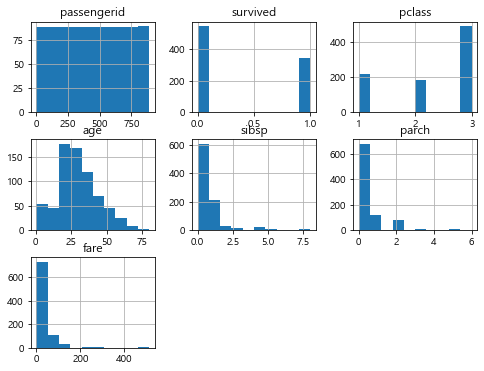

In [19]:
train.hist(figsize=(8,6))
plt.show()

In [20]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [21]:
cols = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']
# cols에 passengerid와 name 없는 이유는 -> 완전한 개인 특성이라고 생각하기 때문
# feature value_counts 5개만 출력 
for col in cols:
    print(col, '\n',np.array(dict(train[col].value_counts().head())))

survived 
 {0: 549, 1: 342}
pclass 
 {3: 491, 1: 216, 2: 184}
sex 
 {'male': 577, 'female': 314}
age 
 {24.0: 30, 22.0: 27, 18.0: 26, 19.0: 25, 28.0: 25}
sibsp 
 {0: 608, 1: 209, 2: 28, 4: 18, 3: 16}
parch 
 {0: 678, 1: 118, 2: 80, 5: 5, 3: 5}
ticket 
 {'347082': 7, 'CA. 2343': 7, '1601': 7, '3101295': 6, 'CA 2144': 6}
fare 
 {8.05: 43, 13.0: 42, 7.8958: 38, 7.75: 34, 26.0: 31}
cabin 
 {'B96 B98': 4, 'G6': 4, 'C23 C25 C27': 4, 'C22 C26': 3, 'F33': 3}
embarked 
 {'S': 644, 'C': 168, 'Q': 77}


- 공통된 값을 가진 피쳐 데이터 확인

- : pclass, age 자체로 인물들간의 관계를 확인하기 어려우나, 동일그룹이라면 ticket, cabin, embarked, fare가 같을 것으로 추측

In [22]:
# - Ticket : CA. 2343
train[(train['ticket']=='CA. 2343')]

#  - 특정 티켓번호를 검색.
#  - 몇가지 공통점이 있다. 
# 사망(survived=0), 객실등급(pclass=3), 이름(Sage, 성은 아님), 
# 가족관계(sibsp=8, parch=2), 요금(fare=69.55), 탑승지(embarked=S)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [23]:
train[(train['ticket']=='1601')]

# 그러나 아래와 같은 경우도 있다.
# 공톰점 : 객실등급(pclass=3), 홀로 탑승(sibsp&parch=0), 요금(fare=56.4958), 탑승지(embarked=S)
# 사망, 이름에 공통점 없음(그러나 빙,링,랑,푸,람,칩 ---- 중국풍 --- 여행사로 묶인 것으로 생각됨 )

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [24]:
# 부모자녀 parch / 형제배우자 sibsp 데이터에 문제가 있는 것으로 보인다.
# -> 그룹 판별용으로만 사용하기
train[train['name'].str.contains('Goodwin')]
train.query("name.str.contains('Sage,')",engine='python')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [25]:
train[(train['ticket']=='C.A. 34651')]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.75,NaN,S
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.75,NaN,S
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.75,NaN,S


In [26]:
# 파생변수 - 그룹네임
train.insert(8,'group_name',train['name'].apply(lambda x:x.split(',')[0]))
test.insert(8,'group_name',test['name'].apply(lambda x:x.split(',')[0]))

In [27]:
# # 순수한 호기심 ----- 
# # 티켓번호가 같으면 같은 그룹인 것으로 추측된다. 그러나 아웃라이어 있는지 확인 필요
# # -----> 티켓번호가 다른데, 그룹이 아닌 경우?

# # 그룹 체크할 ticket list
# ticket_chk= train['ticket'].value_counts()>1
# ticket_chk = ticket_chk[ticket_chk.values==True].index.to_list()
# # ticket_chk

# # 동일 티켓, ticket 외 다른 피쳐에서 값이 다르면 리스트에 추가
# diff_embark, diff_fare, diff_pclass, diff_cabin, diff_name = [],[],[],[],[]
# for ticket in ticket_chk:
#     # print(train[train['ticket']==ticket]['embarked'].nunique())
#     if train[train['ticket']==ticket]['embarked'].nunique() != 1:
#         # print('different embarked :',ticket)
#         diff_embark.append(ticket)
#     elif train[train['ticket']==ticket]['fare'].nunique() != 1:
#         diff_fare.append(ticket)
#     elif train[train['ticket']==ticket]['pclass'].nunique() != 1:
#         diff_pclass.append(ticket)
#     elif train[train['ticket']==ticket]['cabin'].nunique() != 1:
#         diff_cabin.append(ticket)
#     elif train[train['ticket']==ticket]['name'].nunique() != 1:
#         diff_name.append(ticket)
#     elif train[train['ticket']==ticket]['embarked'].nunique() == 0:
#         print('no embarked:',ticket)

# print(f'different embarked : {diff_embark}\ndifferent fare : {diff_fare}\ndifferent pclass : {diff_pclass}')
# print(f'different cabin : {diff_cabin}\ndifferent name : {diff_name}')

In [28]:
# 탑승지, 객실 다르며, 가족도 아닌 것으로 보이나, 티켓번호, 요금, 객실등급이 같다.
train[(train['ticket']=='PC 17760')]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,group_name,ticket,fare,cabin,embarked
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,Bissette,PC 17760,135.6333,C99,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,Young,PC 17760,135.6333,C32,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,Ringhini,PC 17760,135.6333,NaN,C


In [29]:
# 가족이 아닌듯하나, 티켓번호, 요금, 객실등급, 객실 모두 일치한다.
train[(train['ticket']=='113572')]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,group_name,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,Icard,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,Stone,113572,80.0,B28,NaN


In [30]:
# 탑승지도 다르고, 가족도 아닌 것으로 보이나, 티켓번호와 요금, 객실등급이 같다.
train[(train['ticket']=='113798')]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,group_name,ticket,fare,cabin,embarked
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,Cairns,113798,31.0,NaN,S
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,Serepeca,113798,31.0,NaN,C


# 4. PREPROCESSING & FEATRUE ENGINEERING

In [31]:
# group(family) 파생변수 생성
for df in [train,test]:
    # sibsp, parch 의미 없는 것으로 판단됨 -> family size 파생변수 생성
    df.insert(8,'fam_size',df['sibsp'] + df['parch']+1)

    # 그룹(대부분 family로 추측)은 요금이 동일하게 묶임.
    # 또한 3등급인데 1등급보다 요금이 높음 -> family 전체요금으로 판단됨. -> family size로 나눈 파생변수 생성
    df.insert(9,'fam_fare',np.where(df['fam_size']>0, df['fare']/df['fam_size'], df['fare']))

In [32]:
train[train['fam_size']==10]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fam_size,fam_fare,group_name,ticket,fare,cabin,embarked


In [33]:
# 파생변수 - 객실 코드
print(train['cabin'].isna().sum())
for df in [train,test]:
    df['cabin'].fillna('X', inplace=True)
    df['cabin_code']= df['cabin'].apply(lambda x: x[0])


687


In [34]:
# 불필요한 피쳐 삭제
for df in [train,test]:
    # passengerid drop (unique feature)
    df.drop('passengerid', axis=1, inplace=True)
    df.drop('name', axis=1, inplace=True)
    df.drop(['sibsp','parch'], axis=1, inplace=True)
    df.drop('cabin', axis=1, inplace=True)

In [35]:
train.head()

,survived,pclass,sex,age,fam_size,fam_fare,group_name,ticket,fare,embarked,cabin_code
0,0,3,male,22.0,2,3.62500,Braund,A/5 21171,7.2500,S,X
1,1,1,female,38.0,2,35.64165,Cumings,PC 17599,71.2833,C,C
2,1,3,female,26.0,1,7.92500,Heikkinen,STON/O2. 3101282,7.9250,S,X
3,1,1,female,35.0,2,26.55000,Futrelle,113803,53.1000,S,C
4,0,3,male,35.0,1,8.05000,Allen,373450,8.0500,S,X


In [36]:
for df in [train]:
  df['group_chk'] = [str(g) + str(r) + str(o) + str(u) + str(p) + str(c) + str(h) + str(k) 
                for g,r,o,u,p,c,h,k
                      in zip(df['pclass'],df['fam_size'],df['fam_fare'],df['group_name']
                             ,df['ticket'] ,df['fare'],df['embarked'],df['cabin_code'])]





In [37]:
train.sort_values(by = 'group_chk',ascending=False).head()
train[train['group_name']=='Andersson'] # fam_fare에 문제가 있다

,survived,pclass,sex,age,fam_size,fam_fare,group_name,ticket,fare,embarked,cabin_code,group_chk
13,0,3,male,39.0,7,4.467857,Andersson,347082,31.2750,S,X,374.4678571428571425Andersson34708231.275SX
68,1,3,female,17.0,7,1.132143,Andersson,3101281,7.9250,S,X,371.1321428571428571Andersson31012817.925SX
119,0,3,female,2.0,7,4.467857,Andersson,347082,31.2750,S,X,374.4678571428571425Andersson34708231.275SX
146,1,3,male,27.0,1,7.795800,Andersson,350043,7.7958,S,X,317.7958Andersson3500437.7958SX
541,0,3,female,9.0,7,4.467857,Andersson,347082,31.2750,S,X,374.4678571428571425Andersson34708231.275SX
542,0,3,female,11.0,7,4.467857,Andersson,347082,31.2750,S,X,374.4678571428571425Andersson34708231.275SX
610,0,3,female,39.0,7,4.467857,Andersson,347082,31.2750,S,X,374.4678571428571425Andersson34708231.275SX
813,0,3,female,6.0,7,4.467857,Andersson,347082,31.2750,S,X,374.4678571428571425Andersson34708231.275SX
850,0,3,male,4.0,7,4.467857,Andersson,347082,31.2750,S,X,374.4678571428571425Andersson34708231.275SX


In [38]:
train['group_chk'].value_counts()

3116.322727272727272SageCA. 234369.55SX        7
374.4678571428571425Andersson34708231.275SX    7
364.6499999999999995Skoog34708827.9SX          6
385.8625GoodwinCA 214446.9SX                   6
366.614583333333333Panula310129539.6875SX      6
                                              ..
1354.95556666666667Wick36928164.8667SC         1
1344.833333333333336Spedden16966134.5CE        1
317.25DennisA/5 211727.25SX                    1
317.8958Danoff3492197.8958SX                   1
317.75Dooley3703767.75QX                       1
Name: group_chk, Length: 749, dtype: int64

In [39]:
# 그룹체크 unique값은 0으로 바꿔주기 위함
g_chk= train['group_chk'].value_counts()==1
g_chk = g_chk[g_chk.values==True].index.to_list()
len(g_chk)

658

In [40]:
for chk in df['group_chk']:
    if chk in g_chk:
        train.loc[train['group_chk']==chk,'group_chk']='not_grouped'

In [41]:
# 결과 확인ㅇ 
g_chk= train['group_chk'].value_counts()==1
g_chk = g_chk[g_chk.values==True].index.to_list()
len(g_chk)

0

In [42]:
# 진짜 group 개수
df['group_chk'].nunique()

92

In [43]:
train.head()

,survived,pclass,sex,age,fam_size,fam_fare,group_name,ticket,fare,embarked,cabin_code,group_chk
0,0,3,male,22.0,2,3.62500,Braund,A/5 21171,7.2500,S,X,not_grouped
1,1,1,female,38.0,2,35.64165,Cumings,PC 17599,71.2833,C,C,not_grouped
2,1,3,female,26.0,1,7.92500,Heikkinen,STON/O2. 3101282,7.9250,S,X,not_grouped
3,1,1,female,35.0,2,26.55000,Futrelle,113803,53.1000,S,C,1226.55Futrelle11380353.1SC
4,0,3,male,35.0,1,8.05000,Allen,373450,8.0500,S,X,not_grouped


In [44]:
map_sex = {'female':0, 'male':1}
map_embark = {'S':0, 'C':1, 'Q':2}
map_cabin = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F': 5, 'G':6, 'T':7, 'X':8}

for df in [train,test]:
    df['sex'] = df['sex'].map(map_sex)
    df['embarked'] = df['embarked'].map(map_embark)
    df['cabin_code'] = df['cabin_code'].map(map_cabin)

In [45]:
train.head()

,survived,pclass,sex,age,fam_size,fam_fare,group_name,ticket,fare,embarked,cabin_code,group_chk
0,0,3,1,22.0,2,3.62500,Braund,A/5 21171,7.2500,0.0,8,not_grouped
1,1,1,0,38.0,2,35.64165,Cumings,PC 17599,71.2833,1.0,2,not_grouped
2,1,3,0,26.0,1,7.92500,Heikkinen,STON/O2. 3101282,7.9250,0.0,8,not_grouped
3,1,1,0,35.0,2,26.55000,Futrelle,113803,53.1000,0.0,2,1226.55Futrelle11380353.1SC
4,0,3,1,35.0,1,8.05000,Allen,373450,8.0500,0.0,8,not_grouped



 pclass = 1 



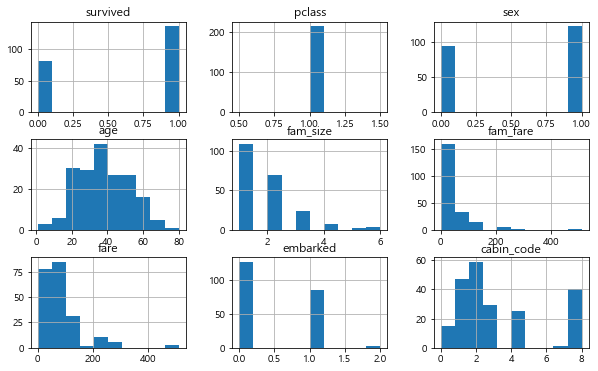


 pclass = 2 



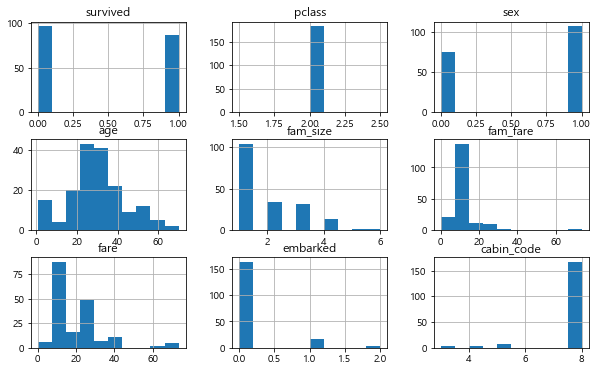


 pclass = 3 



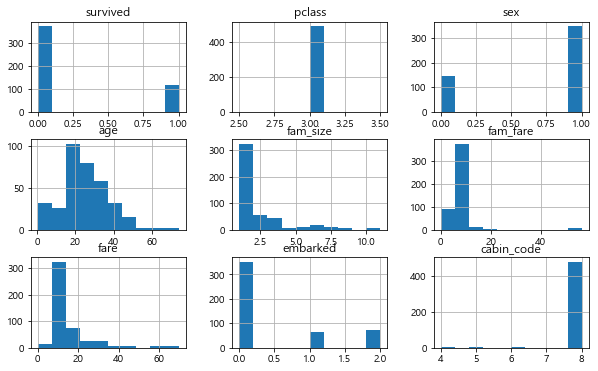

In [46]:
for i in range(1,3+1):
    print(f'\n pclass = {i} \n')
    train[train['pclass']==i].hist(figsize=(10,6))
    plt.show()

pclass  cabin_code
1       2              59
        1              47
        8              40
        3              29
        4              25
        0              15
        7               1
2       8             168
        5               8
        3               4
        4               4
3       8             479
        5               5
        6               4
        4               3
Name: cabin_code, dtype: int64


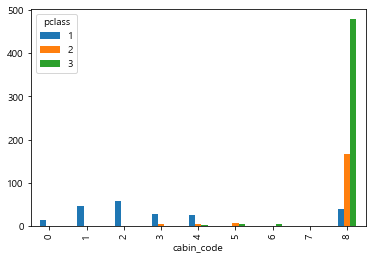

In [47]:
# df.groupby(['Animal']).mean()
grouped = train.groupby(['pclass'])
print(grouped['cabin_code'].value_counts())
train.groupby('cabin_code')['pclass'].value_counts().unstack().plot.bar()
plt.show()

<!-- # 5. TRAINING -->

In [48]:
# cabin code 결측치 채우고 피쳐로 사용하려 했으나, 너무 많은 결측으로 판단 불가
train.drop(['cabin_code'],axis=1, inplace=True)
test.drop(['cabin_code'],axis=1, inplace=True)


In [49]:
train.drop(['fare'],axis=1, inplace=True)
test.drop(['fare'],axis=1, inplace=True)

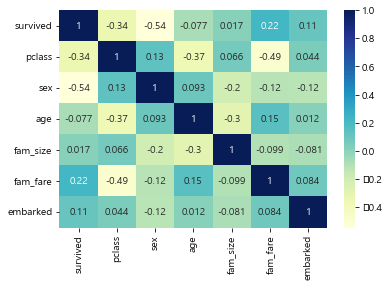

In [50]:
sns.heatmap(data=train.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [51]:
df_corr = pd.DataFrame()
df_corr['pearson'] = train.corrwith(train['survived'])
df_corr.sort_values('pearson',ascending=False)

,pearson
survived,1.000000
fam_fare,0.221600
embarked,0.108669
fam_size,0.016639
age,-0.077221
pclass,-0.338481
sex,-0.543351


In [52]:
# 요금이 이상한 데이터 삭제
drop_idx = train.loc[train['fam_fare']>=400].index
train.drop(drop_idx,inplace=True)

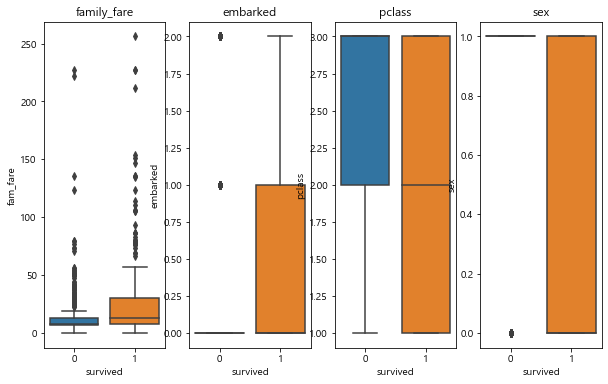

In [53]:
f, axes = plt.subplots(ncols=4, figsize=(10,6))

sns.boxplot(x='survived', y='fam_fare', data=train, ax=axes[0])
axes[0].set_title('family_fare')

sns.boxplot(x='survived', y='embarked', data=train, ax=axes[1])
axes[1].set_title('embarked')

sns.boxplot(x='survived', y='pclass', data=train, ax=axes[2])
axes[2].set_title('pclass')

sns.boxplot(x='survived', y='sex', data=train, ax=axes[3])
axes[3].set_title('sex')
plt.show()

In [54]:
# embark 결측치 채우기
train[train['embarked'].isnull()]
train[(train['ticket'].str.contains('11'))&(train['pclass']==1)]['embarked'].value_counts()
train[(train['pclass']==1)]['embarked'].value_counts()
# embarked 0('S') 비중이 많다. S로 채워준다.

train['embarked'].fillna(0,inplace=True)

In [55]:
# age 결측치 채우기
for df in [train,test]:
    age_avg = df['age'].mean()
    age_std = df['age'].std()
    age_null_count = df['age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    df['age'][np.isnan(df['age'])] = age_null_random_list
    df['age'] = df['age'].astype(int)

In [56]:
# fare 결측치 채우기 
test[test['fam_fare'].isnull()]
fare_mean = test[(test['pclass']==3)&(test['age']>=40)]['fam_fare'].mean()

test['fam_fare'].fillna(fare_mean,inplace=True)

In [57]:
# object 피쳐 group_chk 0,1로 맵핑
for df in [train,test]:
    df.loc[(df['fam_size']==1),'group_chk']=0
    df.loc[(df['group_chk']=='not_grouped'),'group_chk']=0
    df.loc[(df['group_chk']!=0),'group_chk']=1
    df['group_chk'].astype(int)

In [58]:
train['group_chk'].value_counts()

0    660
1    229
Name: group_chk, dtype: int64

In [59]:
# numeric feature scaling 
scale_features = ['age','fam_fare'] 

for sf in scale_features:
    train[sf]=np.log1p(train[sf])
    test[sf]=np.log1p(test[sf])

In [60]:
# 그룹화 피쳐를 남겼으니 나머지 삭제해보자
for df in [train,test]:
    df.drop(['group_name'],axis=1, inplace=True)
    df.drop(['ticket'],axis=1, inplace=True)

In [61]:
train.head()

,survived,pclass,sex,age,fam_size,fam_fare,embarked,group_chk
0,0,3,1,3.135494,2,1.531476,0.0,0
1,1,1,0,3.663562,2,3.601186,1.0,0
2,1,3,0,3.295837,1,2.188856,0.0,0
3,1,1,0,3.583519,2,3.316003,0.0,1
4,0,3,1,3.583519,1,2.202765,0.0,0


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     418 non-null    int64  
 1   sex        418 non-null    int64  
 2   age        418 non-null    float64
 3   fam_size   418 non-null    int64  
 4   fam_fare   418 non-null    float64
 5   embarked   418 non-null    int64  
 6   group_chk  418 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 23.0 KB


## - TRAIN TEST SPLIT

In [63]:
X= train.drop('survived',axis=1)
y= train['survived']
print(X.shape,y.shape)

(889, 7) (889,)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 36, shuffle= True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train[:5] # shuffled

(711, 7) (178, 7) (711,) (178,)


754    1
273    0
413    0
358    1
62     0
Name: survived, dtype: int64

## - MAKE MODEL

- sample : model = dt(DecisionTreeClassifier)
- 그 외 모델 :  

In [65]:
dt= DecisionTreeClassifier(random_state=36)

## - FIT MODEL

In [66]:
dt.fit(X_train, y_train) 
dt_pred= dt.predict(X_test)
dt_proba= dt.predict_proba(X_test)
# 예측된 결과 샘플 확인
print(dt_pred[:5])
print(dt_proba[:5])

[0 0 1 0 0]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# 9. EVALUATE & VALIDATE

### EVALUATE

In [67]:
# 점수 출력 함수
def scores(y_test,y_pred,proba):
    a = accuracy_score(y_test,y_pred)
    p = precision_score(y_test,y_pred)
    r = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    # print(f'accuracy= {accuracy_score(y_test,y_pred)}')
    # print('precision= ',precision_score(y_test,y_pred, average='macro'))
    # print('recall= ',recall_score(y_test,pred, average='macro'))
    print(f'accuracy: {a: .6f}, precison: {p:.6f},recall: {r:.6f}, f1: {f1:.6f}')
    print(f' confusion_matrix \n {confusion_matrix(y_test,y_pred)}')
    # return accuracy_score, precision_score, confusion_matrix, roc_auc_score

In [68]:
scores(y_test,dt_pred,dt_proba)

accuracy:  0.780899, precison: 0.728571,recall: 0.718310, f1: 0.723404
 confusion_matrix 
 [[88 19]
 [20 51]]


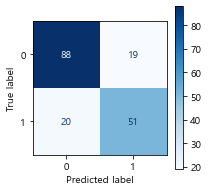

In [69]:
# confusion matrix chart 출력
fig, ax =plt.subplots(figsize=(3,3))
plot_confusion_matrix(dt, X_test, y_test, labels=dt.classes_,cmap='Blues', ax=ax)
plt.show()

In [70]:
# classification report
report = classification_report(y_test, dt_pred, labels= dt.classes_)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       107
           1       0.73      0.72      0.72        71

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [71]:
lr = LogisticRegression()
lr.fit(X_train, y_train) 
lr_pred= lr.predict(X_test)
lr_proba= lr.predict_proba(X_test)
scores(y_test,lr_pred,lr_proba)

accuracy:  0.786517, precison: 0.761905,recall: 0.676056, f1: 0.716418
 confusion_matrix 
 [[92 15]
 [23 48]]


In [72]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 
rf_pred= rf.predict(X_test)
rf_proba= rf.predict_proba(X_test)
scores(y_test,rf_pred,rf_proba)

accuracy:  0.792135, precison: 0.757576,recall: 0.704225, f1: 0.729927
 confusion_matrix 
 [[91 16]
 [21 50]]


In [73]:
# # 실제값 예측값 다른 인덱스 확인
# y_p = dt_pred
# y_t = y_test
# # print('예측값: ',y_p) 
# # print('실제값: ',np.array(y_t).flatten())
# # diff = [idx for i,j in enumerate(zip)]
# diff = [f'index={idx},예측값={pred},실제값={true}' for idx, (pred,true) in enumerate(zip(y_p,y_t)) if pred!=true ]
# diff

### VALIDATE

In [74]:
# SKFOLD
N_SPLIT = 5 
skfold = StratifiedKFold(n_splits=N_SPLIT, shuffle=True, random_state= 36)
scores= [] # 점수 담을 리스트 생성

for n_fold,(train_index, test_index) in enumerate(skfold.split(X,y)):  #-----------KFold
    print("TRAIN:", len(train_index) , "TEST:", len(test_index)) 
#     print(f'FOLD : {n_fold}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
    print(y_train.value_counts())
    
    rf.fit(X_train,y_train)  # fold마다 학습
    pred = rf.predict(X_test)
    # proba = dt.predict_proba(X_test)
    f1 = f1_score(y_test, pred, average='binary')
    scores.append(f1)
    print(f'F1 : {f1:.6f}\n')
print(f'{N_SPLIT}회 평균 F1 SCORE : {np.array(scores).mean():.6f}')

TRAIN: 711 TEST: 178
0    439
1    272
Name: survived, dtype: int64
F1 : 0.703125

TRAIN: 711 TEST: 178
0    439
1    272
Name: survived, dtype: int64
F1 : 0.701493

TRAIN: 711 TEST: 178
0    439
1    272
Name: survived, dtype: int64
F1 : 0.748092

TRAIN: 711 TEST: 178
0    439
1    272
Name: survived, dtype: int64
F1 : 0.691729

TRAIN: 712 TEST: 177
0    440
1    272
Name: survived, dtype: int64
F1 : 0.751880

5회 평균 F1 SCORE : 0.719264


In [75]:
# CROSS VAL SCORE
# cv = N_SPLIT
scores = cross_val_score(lr, X, y,cv=5)
print(scores)
print(f'F1 : {np.array(scores).mean()}')

# # cv = kfold
# scores2 = cross_val_score(lr, X, y,cv=kfold)
# print(scores2)
# print(f'F1 : {np.array(scores2).mean()}')

# cv = skfold
scores3 = cross_val_score(lr, X, y, cv=skfold)
print(scores3)
print(f'F1 : {np.array(scores3).mean()}')

[0.80898876 0.80898876 0.79775281 0.78651685 0.84180791]
F1 : 0.8088110201231512
[0.80898876 0.81460674 0.79213483 0.81460674 0.8079096 ]
F1 : 0.807649336634292


# 10. SAVE MODEL

# Submission

In [76]:
my_param = {
            "max_depth":[1,2,3,4,5],
            "min_samples_split":[1,2,3]
            }

In [77]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=3)
gcv = GridSearchCV(rf, param_grid=my_param,scoring='accuracy', refit=True, cv=5)

gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)
# 0.8200533231765379
# {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 300}

0.8177934361708881
{'max_depth': 4, 'min_samples_split': 3}


In [78]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(max_depth=4, min_samples_split=3)
gcv = GridSearchCV(dt, param_grid=my_param,scoring='accuracy', refit=True, cv=5)

gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)
# 0.8223322541738082
# {'max_depth': 5, 'min_samples_split': 2}

0.8223005141877738
{'max_depth': 5, 'min_samples_split': 3}


In [79]:
pred = gcv.predict(test) 

In [80]:
pred= pred.reshape(-1,1)

In [ ]:
sub = pd.read_csv('ksample_submission.csv')
sub.loc[:,'Survived']=pred
sub.to_csv('submission_2_titanic.csv',index=False)
sub.head()

# 기타 데이터 핸들링 참고 코드